# Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem
Matplotlib Box Plots
Problem Statement:
Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
Use list comprehension to create a list of DataFrames for each country.
Use the plt.boxplot() function to plot this list and specify the labels as countries.
Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Pedro\AppData\Local\Temp\ipykernel_14548\1203085588.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=countries)


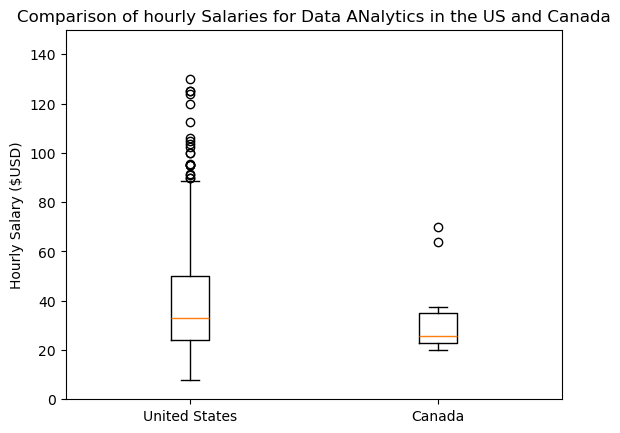

In [ ]:
countries = ['United States', 'Canada']

#Only get data analyst jobs in the US and Canada
df_DA_US_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].copy()

#Drop NaN values from the column for plotting
df_DA_US_CA = df_DA_US_CA.dropna(subset=['salary_hour_avg'])

country_data = [df_DA_US_CA[df_DA_US_CA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of hourly Salaries for Data ANalytics in the US and Canada')
plt.show()